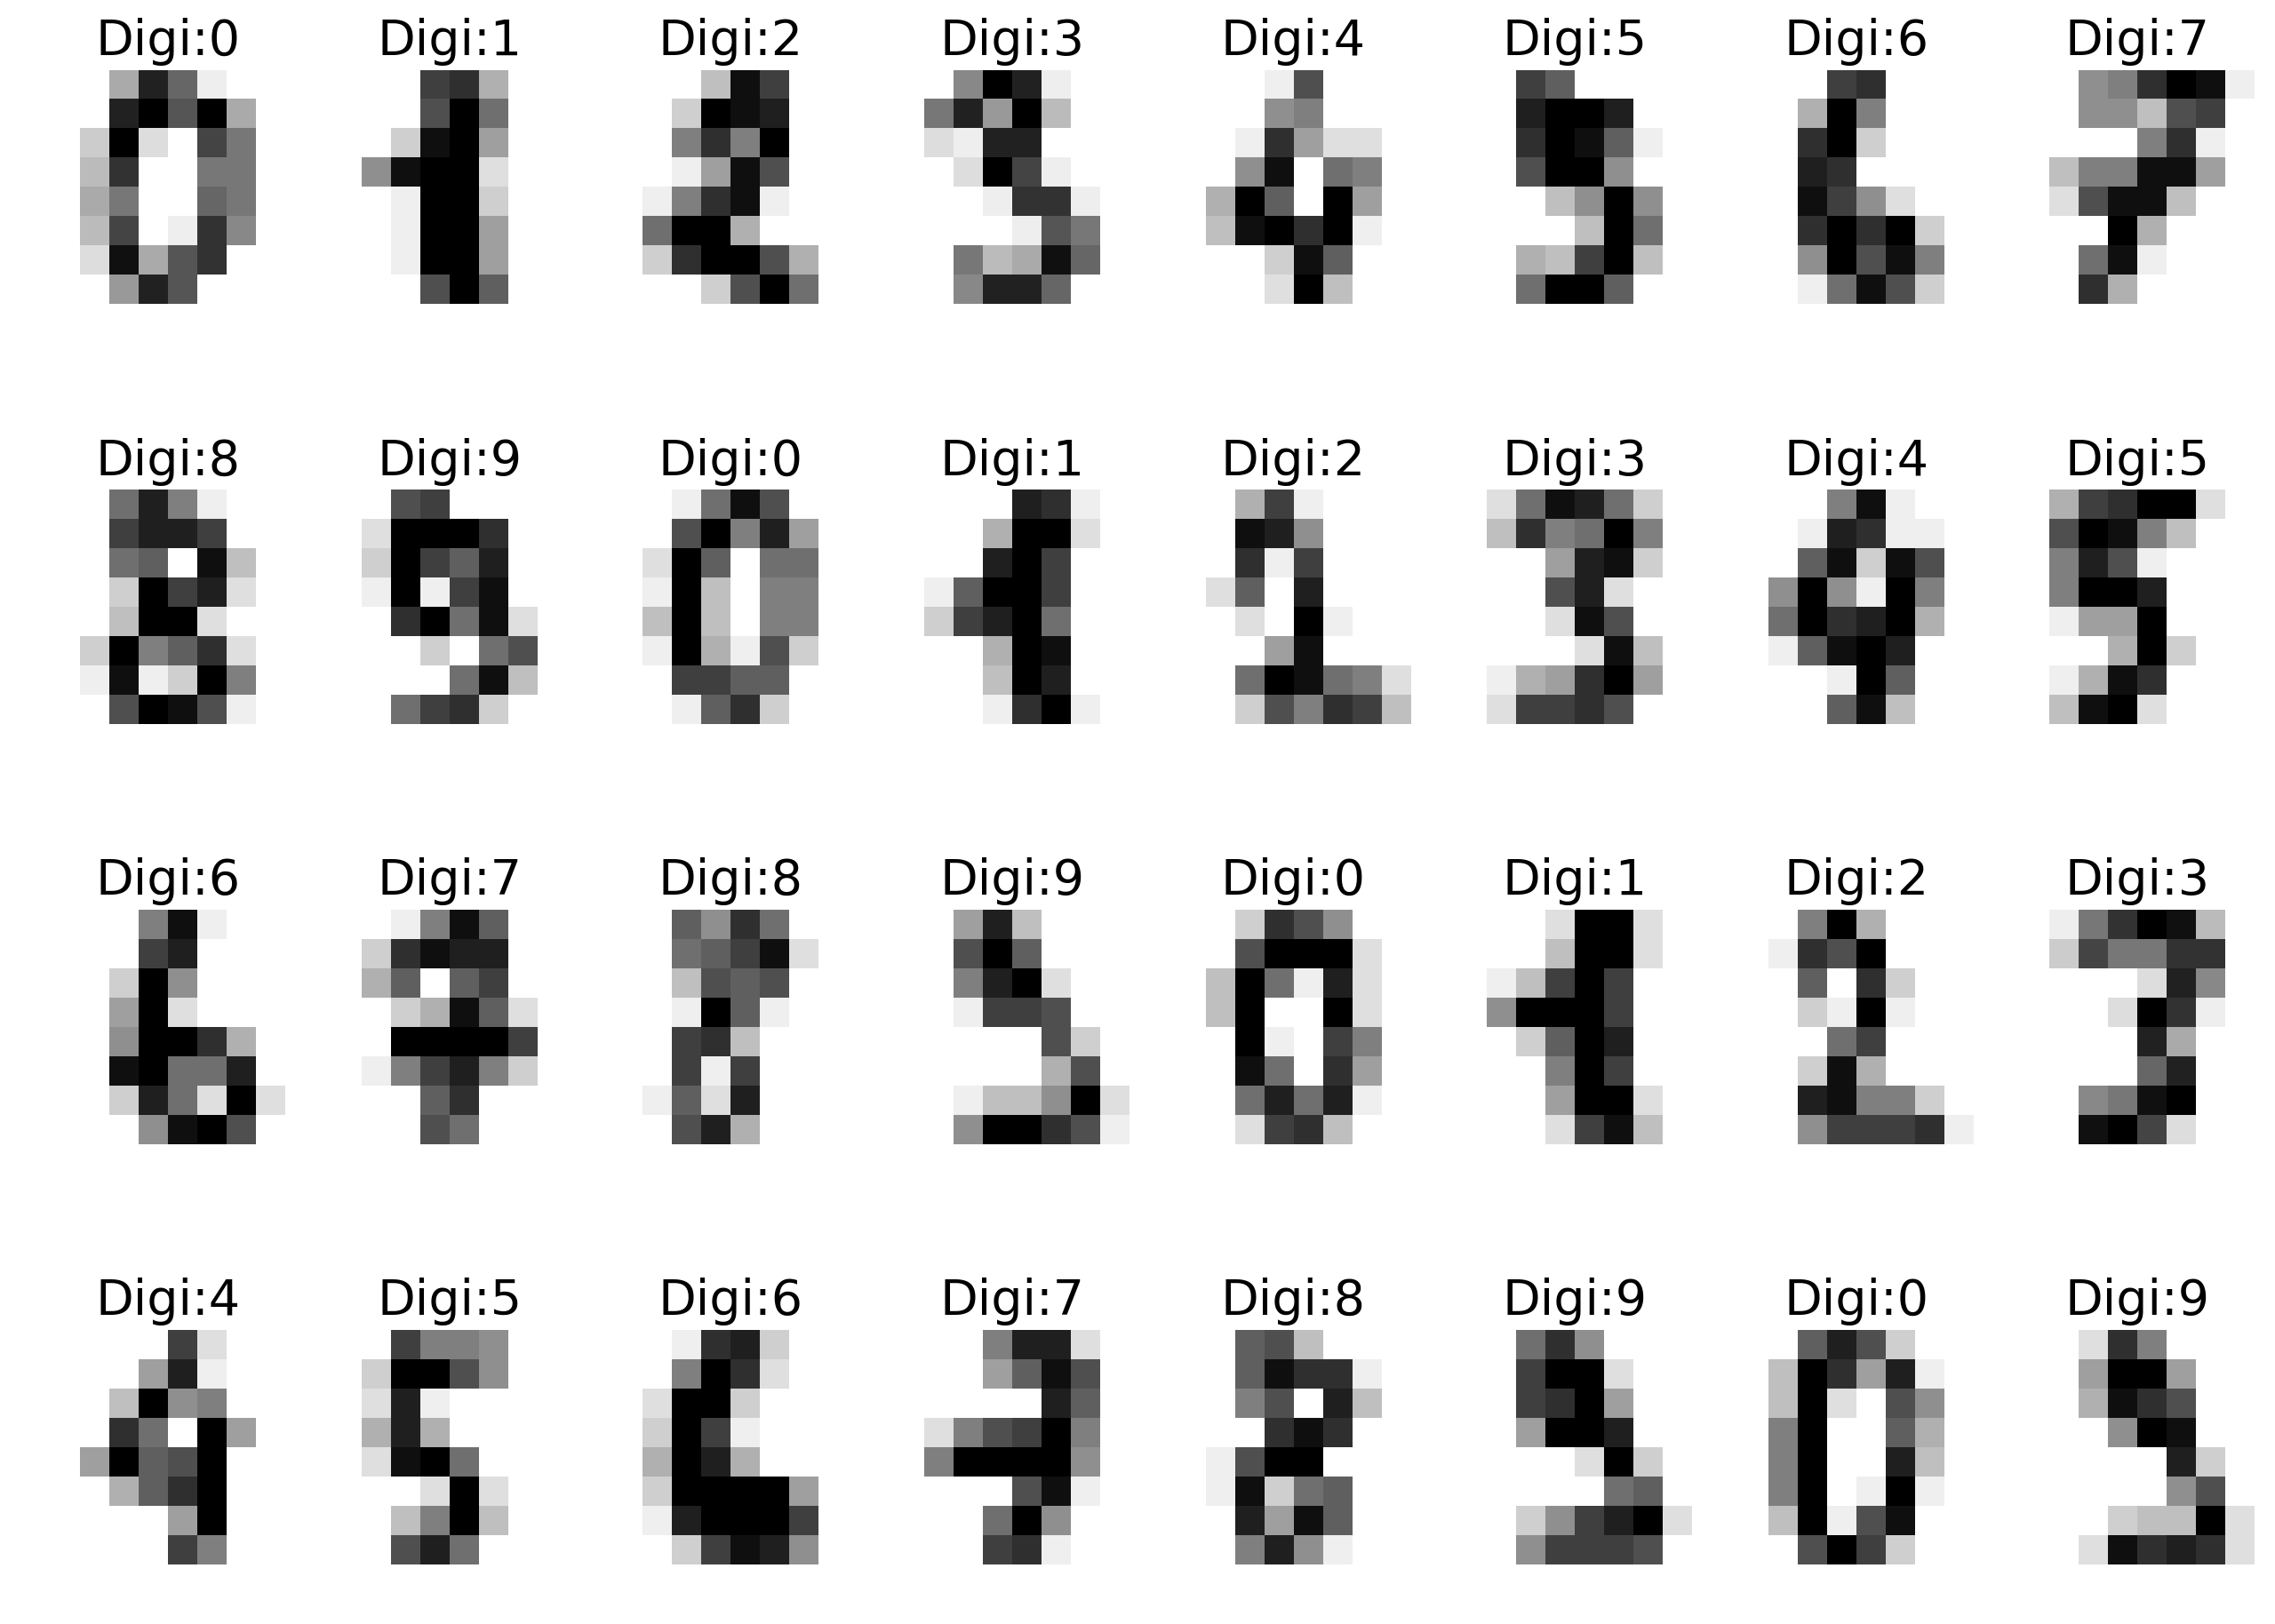

In [15]:
from matplotlib import pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images,digits.target))
plt.figure(figsize = (16,12),dpi = 200)
for index,(image,label) in enumerate(images_and_labels[:32]):
    plt.subplot(4,8,index+1)#多打印了几个数字
    plt.axis('off')
    plt.imshow(image,cmap = plt.cm.gray_r,interpolation = 'nearest')
    plt.title('Digi:%i'%label,fontsize=20)
    


In [18]:
print("shape of raw image data:{0}".format(digits.images.shape))
print("shape of data:{}".format(digits.data.shape))

shape of raw image data:(1797, 8, 8)
shape of data:(1797, 64)


In [41]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(digits.data,digits.target,test_size = 0.2,random_state = 2)

from sklearn import svm
clf = svm.SVC(gamma = 0.001,C = 100.)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)


0.9777777777777777

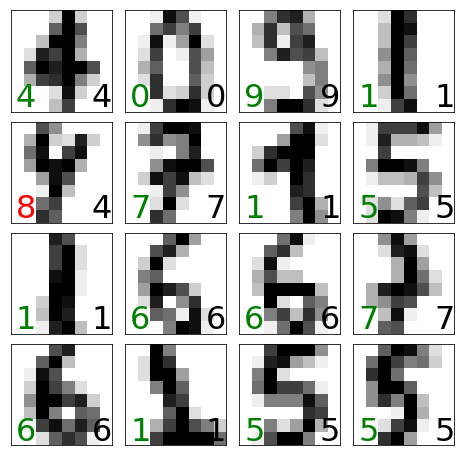

In [42]:
fig,axes = plt.subplots(4,4,figsize = (8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
Ypred = clf.predict(Xtest)
for i,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8),cmap = plt.cm.gray_r,interpolation='nearest')
    ax.text(0.05,0.05,str(Ypred[i]),fontsize=32,transform=ax.transAxes,color='green' if Ypred[i]==Ytest[i] else 'red')
    ax.text(0.8,0.05,str(Ytest[i]),fontsize = 32,transform=ax.transAxes,color='black')
    ax.set_xticks([])
    ax.set_yticks([])

In [44]:
from sklearn.externals import joblib
joblib.dump(clf, 'digits_svm.pkl')
clf=joblib.load('digits_svm.pkl')
Ypred=clf.predict(Xtest)
clf.score(Xtest, Ytest)#原来的书上代码可能有些问题

0.9777777777777777